In [12]:

#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [18]:
df.columns #columns names

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [19]:
df.shape #number of rowa and cols

(17880, 18)

In [20]:
df.isnull().sum() #checking missing values in dataset

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [21]:
#remove cols which are not necessary
df.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)


In [22]:

df.shape
df.head() #shows first 5 rows

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [23]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
df.fillna(' ', inplace=True)


In [24]:

#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting
target = "fraudulent"
# Define a random state
state = np.random.RandomState(42)
X = df[columns]
Y = df["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)

df3 = pd.DataFrame(y_res)

# the default behaviour is join='outer'
# inner join

result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
13046,"Home Health RN--Hondo, NM","US, NM, Hondo",,"Critical Nurse Staffing, Inc. is enrolled with...","Critical Nurse Staffing, Inc. is looking for c...",,,,,,,,0
16129,Resevoir Engineer,"US, OK, Oklahoma City",,Valor Services provides Workforce Solutions th...,"Our client, located in Oklahoma City, is activ...",Ability to calculate well EURs volumetrically ...,,,,,,,0
354,Php web developer,"US, ,",,,Sr. PHP developerExperience : 4-10 yearsLocati...,,,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
7403,Agile Tester,"GB, LND, London",Product Team,DICE gets fans the best tickets at face value ...,We are looking for someone with a focus on qua...,Experience of automated testing for mobile app...,If having a ping pong table sways you to join ...,Full-time,,,Entertainment,,0
15321,2015 MBA- Advisory & Consulting Associate,"US, CA, Newport Beach",,Green Street Advisors is the industry leader i...,Green Street’s Advisory and Consulting group i...,We are highly selective – candidates should po...,Green Street Advisors offers a competitive sal...,Full-time,Associate,Master's Degree,Financial Services,Consulting,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [25]:
df.isnull().sum()

,0
title,0
location,0
department,0
company_profile,0
description,0
requirements,0
benefits,0
employment_type,0
required_experience,0
required_education,0


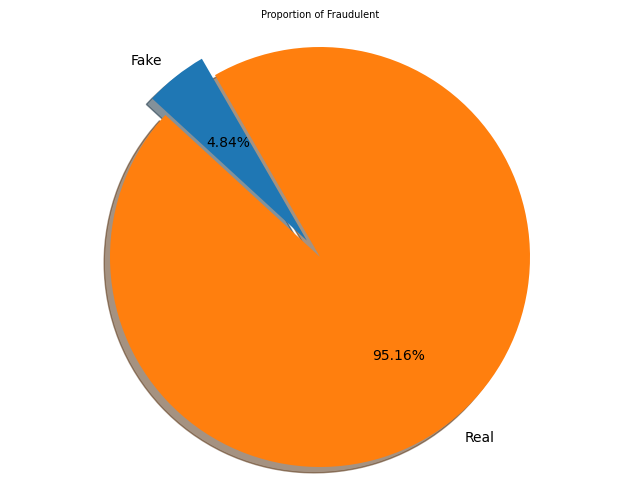

In [26]:
 # Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))

labels = 'Fake', 'Real'
sizes = [df.fraudulent[df['fraudulent']== 1].count(), df.fraudulent[df['fraudulent']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

In [27]:

# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

df['country'] = df.location.apply(split)
df['country']


,country
0,US
1,NZ
2,US
3,US
4,US
...,...
17875,CA
17876,US
17877,US
17878,NG


In [28]:

# this will give unique country values
df['country'].nunique()

91

In [29]:
# top 10 country that post jobs
df['country'].value_counts()[:11]

,count
country,
US,10656
GB,2384
GR,940
CA,457
DE,383
,346
NZ,333
IN,276
AU,214


Text(0.5, 0, 'Countries')

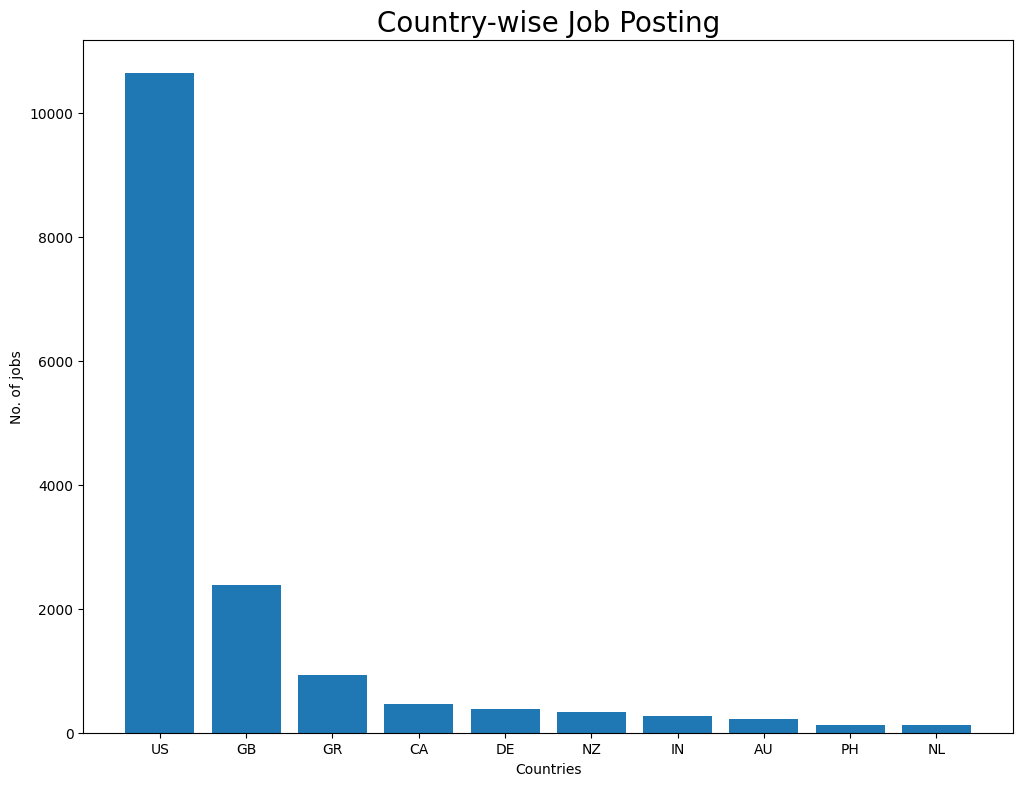

In [30]:

# creating a dictionary(key-value pair) with top 10 country
country = dict(df.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [31]:
country.keys()

dict_keys(['US', 'GB', 'GR', 'CA', 'DE', 'NZ', 'IN', 'AU', 'PH', 'NL'])

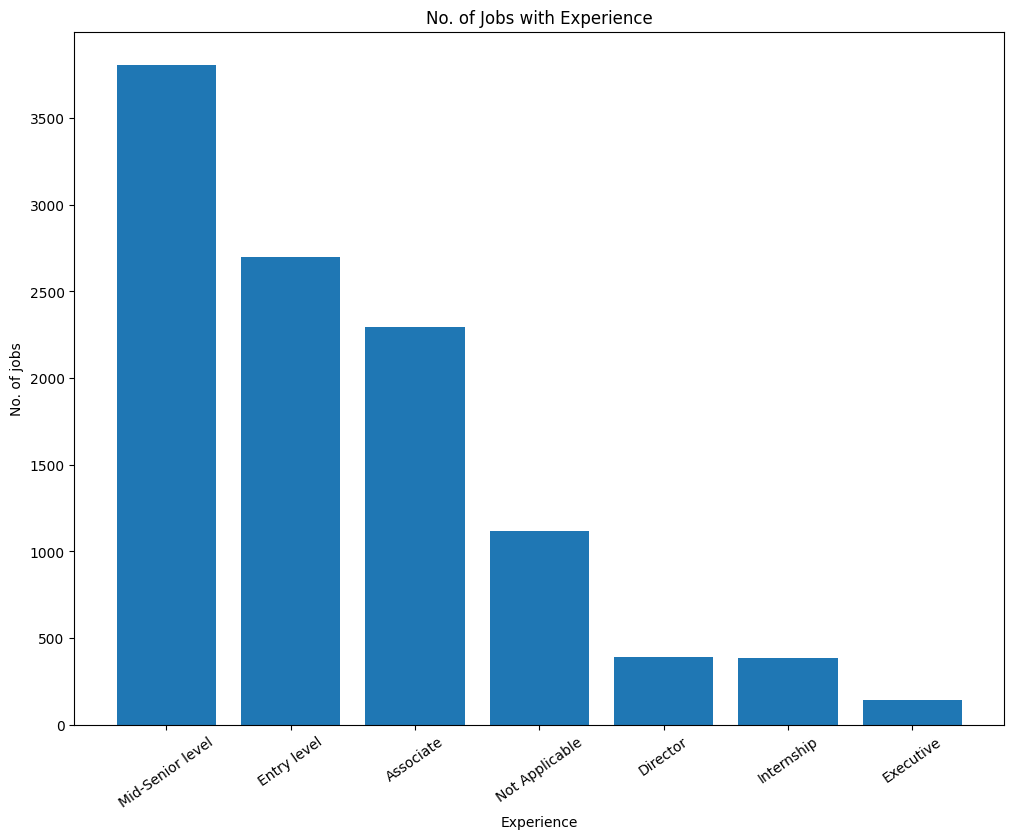

In [32]:

# visualizing jobs based on experience
experience = dict(df.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [33]:

#Most frequent jobs
print(df.title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [34]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(df[df.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Payroll Clerk                                                           10
Name: count, dtype: int64


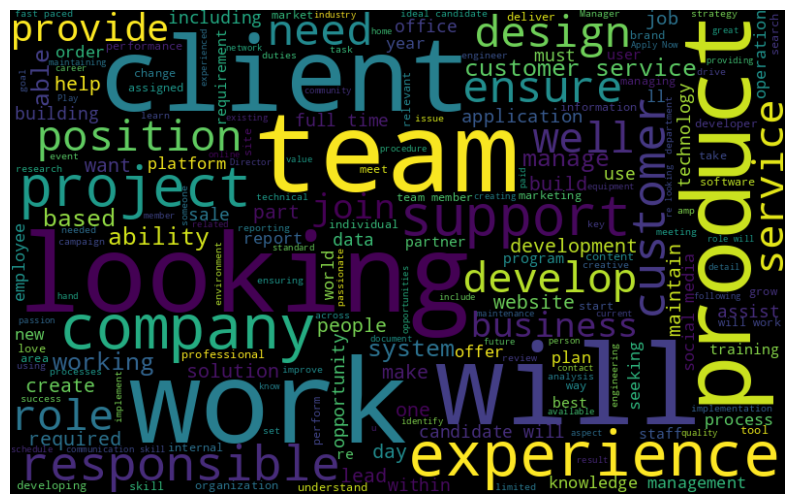

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Replace TEXT_COLUMN with the correct column name
TEXT_COLUMN = "description"    # change this after checking df.columns

all_words = " ".join(df[TEXT_COLUMN].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


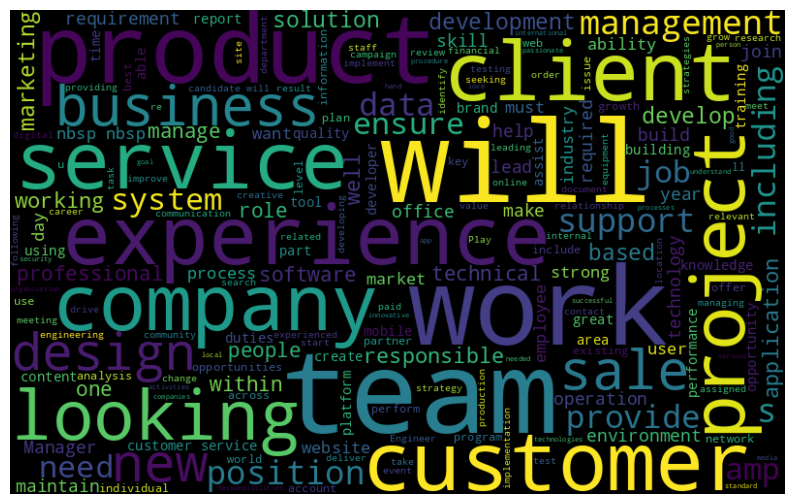

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the correct text column: "description"
real_post = " ".join(
    data.loc[data['fraudulent'] == 0, "description"]
        .dropna()
        .astype(str)
)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(real_post)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


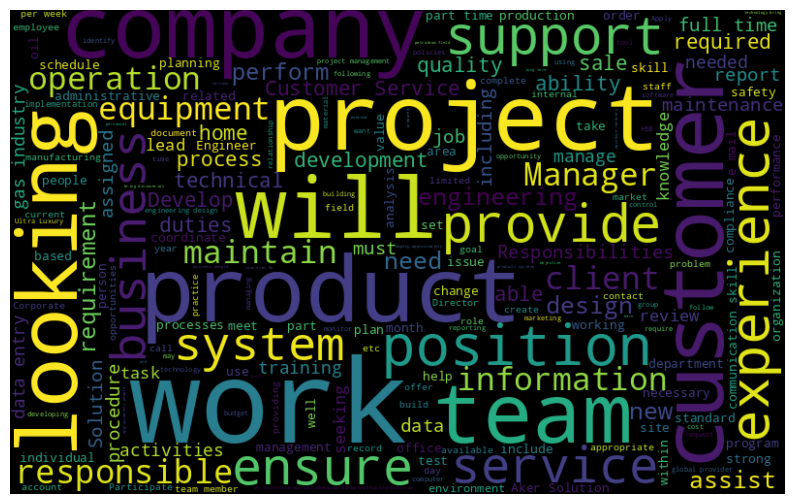

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the correct text column: "description"
fraud_post = " ".join(
    data.loc[data['fraudulent'] == 1, "description"]
        .dropna()
        .astype(str)
)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(fraud_post)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [38]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:

print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [40]:
from nltk.corpus import stopwords

# 1) Load stopwords
stop_words = set(stopwords.words("english"))

# 2) Create a 'text' column (combine useful text fields)
df["text"] = (
    df["title"].astype(str) + " "
    + df["description"].astype(str) + " "
    + df["requirements"].astype(str)
)

# 3) Convert to lowercase
df["text"] = df["text"].str.lower()

# 4) Remove stopwords
df["text"] = df["text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)

# 5) Show cleaned text sample
df["text"][0]


'marketing intern food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging existing food52 content number partner sites, huffington post, yahoo, buzzfeed, various content management systemsresearching blogs websites provisions food52 affiliate programassisting day-to-day affiliate program support, screening affiliates assisting affiliate inquiriessupporting pr &amp; events neededhelping office administrative work, filing, mailing, preparing meetingsworking developers document bugs suggest improvements sitesupporting marketing executive staff experience content management systems major plus (any blogging counts!)familiar food52 editorial voice aestheticloves food, appreciates importance home cooking cooking seasonsmeticulous editor, perfectionist, obsessive attention detail, maddened

In [41]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(df.text, df.fraudulent, test_size=0.3)


# what does X-train and y_train contain
print(y_train)
print(X_train)

2809     0
15330    0
13258    0
11818    0
11670    0
        ..
15190    0
59       0
7735     0
5718     0
4869     0
Name: fraudulent, Length: 12516, dtype: int64
2809     senior lead oracle dba w/ rac position adminis...
15330    english teacher abroad play kids, get paid lov...
13258    collections supervisor apply please visit webs...
11818    mobile app developer join mobile development t...
11670    marketing principal via hiring outstanding mar...
                               ...                        
15190    electrical maintenance technician - major stat...
59       product visual designer apcera revolutionizing...
7735     english teacher abroad (conversational) play k...
5718     senior informatica developer/consultant please...
4869     customer support (evening shift) love customer...
Name: text, Length: 12516, dtype: object


In [42]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [43]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1631178 stored elements and shape (12516, 76134)>
  Coords	Values
  (0, 92)	1
  (0, 127)	3
  (0, 162)	3
  (0, 166)	1
  (0, 254)	1
  (0, 654)	1
  (0, 1624)	1
  (0, 2235)	1
  (0, 2627)	1
  (0, 2636)	1
  (0, 2701)	1
  (0, 2797)	1
  (0, 4798)	1
  (0, 4860)	1
  (0, 5236)	1
  (0, 5702)	1
  (0, 6430)	1
  (0, 6950)	2
  (0, 7761)	1
  (0, 9027)	1
  (0, 9167)	4
  (0, 9554)	1
  (0, 9919)	1
  (0, 9954)	3
  (0, 10802)	1
  :	:
  (12515, 66891)	4
  (12515, 66902)	2
  (12515, 66981)	2
  (12515, 68352)	1
  (12515, 68468)	2
  (12515, 68963)	1
  (12515, 69302)	1
  (12515, 69503)	1
  (12515, 70558)	3
  (12515, 70748)	1
  (12515, 71237)	1
  (12515, 71382)	1
  (12515, 71409)	1
  (12515, 71719)	1
  (12515, 71988)	1
  (12515, 71995)	1
  (12515, 72110)	1
  (12515, 72532)	1
  (12515, 72572)	1
  (12515, 73014)	2
  (12515, 73141)	2
  (12515, 73232)	1
  (12515, 73352)	3
  (12515, 73458)	2
  (12515, 73982)	1


In [44]:
# PCA is not advisable for a NLP task,because PCA is for
# principal feature extraction and in this case we already have features


# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 691235 stored elements and shape (5364, 76134)>

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 25.3 ms, sys: 0 ns, total: 25.3 ms
Wall time: 36.9 ms


MultinomialNB()

In [47]:

y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[0 0 0 ... 0 0 0]


Classification Accuracy: 0.9668158090976883
Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5101
           1       0.85      0.40      0.54       263

    accuracy                           0.97      5364
   macro avg       0.91      0.70      0.76      5364
weighted avg       0.96      0.97      0.96      5364

Confusion Matrix

[[5082   19]
 [ 159  104]]


Text(95.72222222222221, 0.5, 'Truth')

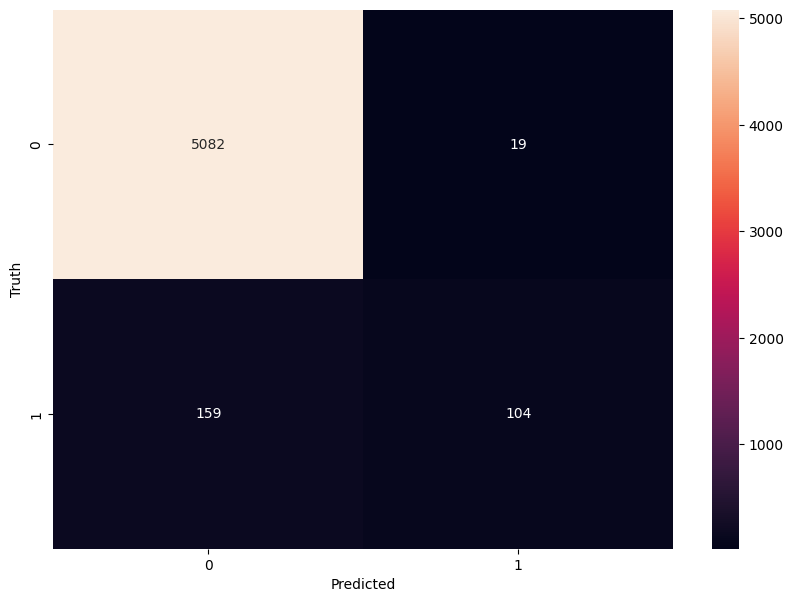

In [50]:
accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()
#train the model
# using X_train_dtm (timing it with an IPython "magic command")
%time dt.fit(X_train_dtm, y_train)

CPU times: user 23.1 s, sys: 12.8 ms, total: 23.2 s
Wall time: 27.3 s


DecisionTreeClassifier()

In [52]:

# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))


Classification Accuracy: 0.9752050708426547
Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5101
           1       0.80      0.66      0.72       263

    accuracy                           0.98      5364
   macro avg       0.89      0.83      0.86      5364
weighted avg       0.97      0.98      0.97      5364

Confusion Matrix

[[5057   44]
 [  89  174]]


Text(95.72222222222221, 0.5, 'Truth')

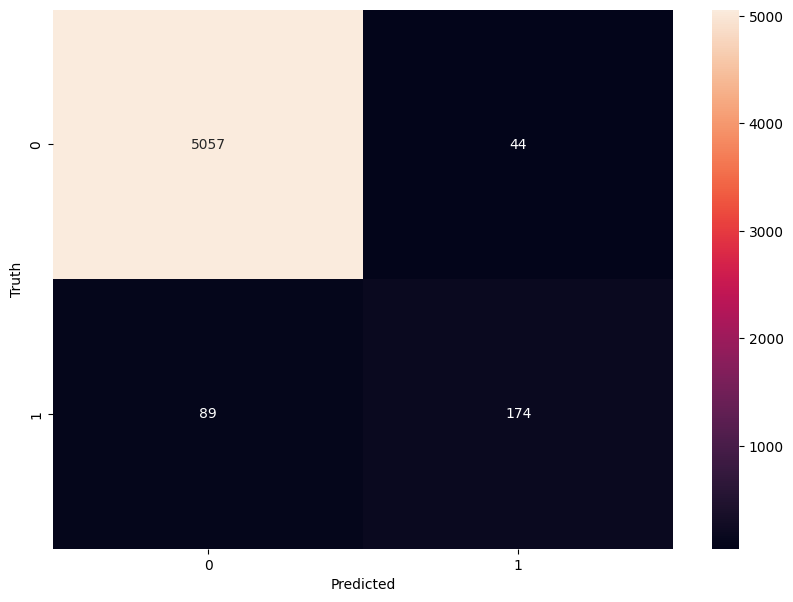

In [53]:

# Confusion Matrix
import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [62]:
# Load your dataset again (if not already loaded)
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/fake_job_postings.csv")

# Extract the text column (change column name if needed)
text_data = df['description'].fillna("")

# Convert entire dataset into feature vectors
features = vect.transform(text_data)

# Predict using your trained Decision Tree
predictions = dt.predict(features)

# Add predictions to the dataframe
df['predicted_label'] = predictions
df['predicted_label_name'] = df['predicted_label'].apply(lambda x: "Fraudulent" if x == 1 else "Real")

# Display first few rows
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,predicted_label,predicted_label_name
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0,Real
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0,Real
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,Real
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,Real
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,Real


In [66]:
#Lets Predict for a data set
X_test

,text
4603,m50 3xp apprentice recruitment consultant gove...
2901,data engineer / dba rapid period growth really...
10512,software developer 100mentors searching new ta...
7346,housing counselor basic job function&nbsp;&nbs...
9120,commercial real estate paralegal- atlanta-buck...
...,...
9133,maintenance technicians tidewater finance comp...
349,embedded systems / telematics security consult...
1169,"local representative consulting, advising, com..."
16670,senior field representative designated supervi...


In [67]:
print(X_test[972])

web developer (full stack) incrediblue changing people experience vacation sea, globally. small, committed team every contribution counts. love always looking skilled excited developers join team.we looking passionate full-stack web developer join development team. ideal profile combines experience server-side client-side code. able demonstrate prior experience web sites proud of.this position hqs volos, greece. able prove experienced following:2+ years experience mvc frameworks, preferably ruby railshtml/css, experience latest html5 css3 features plusclient-side javascriptrelational databases, preferably postgresqlbonus skills:client-side javascript mv* frameworkstdd and/or bddperformance optimizationsource version control, preferably git


In [79]:
input_text = ["Urgent requirement! Work from home and earn ₹80,000/week. No interview needed. Just pay a ₹2500 processing fee to activate your account. Limited slots! Contact on WhatsApp only."]

In [76]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')


[0]
Real Job


In [83]:
actual = y_test[972]
print("Actual label:", actual)

if prediction[0] == actual:
    print("Correct Prediction ✓")
else:
    print("Incorrect Prediction ✗")


Actual label: 0
Correct Prediction ✓
